In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(.95) # 方差95%
# pca.fit(train_data)

In [8]:
import numpy as np
# 区别：PCA选择样本点投影具有最大方差的方向，LDA选择分类性能最好的方向。
data = np.array([[1,4,6,3,6],[5,3,6,2,6],[6,4,8,9,5],[2,5,7,8,3]])

In [9]:
data

array([[1, 4, 6, 3, 6],
       [5, 3, 6, 2, 6],
       [6, 4, 8, 9, 5],
       [2, 5, 7, 8, 3]])

In [14]:
# 按列均值
average = np.mean(data,axis=0) 

In [13]:
average

array([3.5 , 4.  , 6.75, 5.5 , 5.  ])

In [15]:
m,n = np.shape(data)

In [16]:
avgs = np.tile(average, (m, 1)) # 复制average 行方向m倍，列方向1倍

In [17]:
avgs

array([[3.5 , 4.  , 6.75, 5.5 , 5.  ],
       [3.5 , 4.  , 6.75, 5.5 , 5.  ],
       [3.5 , 4.  , 6.75, 5.5 , 5.  ],
       [3.5 , 4.  , 6.75, 5.5 , 5.  ]])

In [18]:
data_dif = data - avgs

In [19]:
data_dif

array([[-2.5 ,  0.  , -0.75, -2.5 ,  1.  ],
       [ 1.5 , -1.  , -0.75, -3.5 ,  1.  ],
       [ 2.5 ,  0.  ,  1.25,  3.5 ,  0.  ],
       [-1.5 ,  1.  ,  0.25,  2.5 , -2.  ]])

In [22]:
covs = np.cov(data_dif.T) # 计算协方差矩阵

In [23]:
covs

array([[ 5.66666667, -1.        ,  1.16666667,  2.        ,  0.66666667],
       [-1.        ,  0.66666667,  0.33333333,  2.        , -1.        ],
       [ 1.16666667,  0.33333333,  0.91666667,  3.16666667, -0.66666667],
       [ 2.        ,  2.        ,  3.16666667, 12.33333333, -3.66666667],
       [ 0.66666667, -1.        , -0.66666667, -3.66666667,  2.        ]])

In [24]:
featureValue,featureVec = np.linalg.eig(covs) # 协方差矩阵的特征值，特征向量

In [25]:
featureValue

array([ 1.49709650e+01,  6.06137126e+00,  5.50997115e-01, -2.64390224e-16,
       -3.77803950e-17])

In [26]:
featureVec

array([[-1.89872377e-01,  9.15782484e-01, -2.81059827e-01,
        -1.17623816e-01,  8.55763142e-05],
       [-1.37404472e-01, -2.51484791e-01, -3.47670039e-02,
        -2.29226488e-01,  3.16587162e-01],
       [-2.35480932e-01,  9.61491133e-02,  2.35168192e-01,
         9.10800202e-01,  8.85314445e-01],
       [-9.04162442e-01, -9.52492356e-02,  2.67518243e-01,
        -2.41268775e-01, -3.16244856e-01],
       [ 2.68528400e-01,  2.82454905e-01,  8.90464227e-01,
        -2.14131326e-01, -1.26412366e-01]])

In [38]:
featureVal = np.argsort(-featureValue) # 从大到小的特征值列数

In [39]:
featureVal

array([0, 1, 2, 4, 3])

In [49]:
# 保留k维度 最大k个特征值对应的列特征向量
k = 2
selectVec = featureVec.T[featureVal[:k]]
# featureVec[[0,1]]

In [55]:
data_dif

array([[-2.5 ,  0.  , -0.75, -2.5 ,  1.  ],
       [ 1.5 , -1.  , -0.75, -3.5 ,  1.  ],
       [ 2.5 ,  0.  ,  1.25,  3.5 ,  0.  ],
       [-1.5 ,  1.  ,  0.25,  2.5 , -2.  ]])

In [57]:
selectVec.T

array([[-0.18987238,  0.91578248],
       [-0.13740447, -0.25148479],
       [-0.23548093,  0.09614911],
       [-0.90416244, -0.09524924],
       [ 0.2685284 ,  0.28245491]])

In [67]:
# finalData：低维特征矩阵
# reconData：移动坐标轴后的矩阵，样本均值向量
    f_data = np.dot(data_dif,selectVec.T)
recon_data = np.dot(data_dif,np.dot(selectVec.T,selectVec)) + average

In [68]:
f_data

array([[ 3.18022615, -1.84099005],
       [ 3.46230355,  2.16887391],
       [-3.93360065,  2.07627028],
       [-2.70892904, -2.40415414]])

In [69]:
recon_data

array([[1.21021646, 4.0260037 , 5.82410782, 2.79991186, 5.33398437],
       [4.82882093, 2.97882521, 6.14322884, 2.16293159, 6.54233591],
       [6.14829406, 4.01834392, 7.87591949, 8.85885081, 4.53016924],
       [1.81266855, 4.97682716, 7.15674385, 8.17830574, 3.59351049]])

In [76]:
import matplotlib.pyplot as plt
def plotBestFit(data1, data2):    
    dataArr1 = np.array(data1)
    dataArr2 = np.array(data2)

    m = np.shape(dataArr1)[0]
    axis_x1 = []
    axis_y1 = []
    axis_x2 = []
    axis_y2 = []
    for i in range(m):
        axis_x1.append(dataArr1[i,0])
        axis_y1.append(dataArr1[i,1])
        axis_x2.append(dataArr2[i,0]) 
        axis_y2.append(dataArr2[i,1])                 
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(axis_x1, axis_y1, s=50, c='red', marker='s')
    ax.scatter(axis_x2, axis_y2, s=50, c='blue')
    plt.xlabel('x1'); 
    plt.ylabel('x2');
    plt.show()  

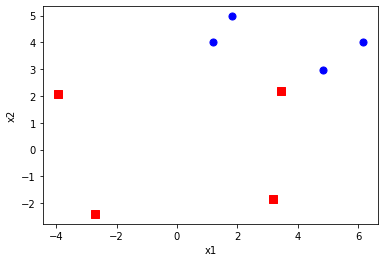

In [78]:
plotBestFit(f_data,recon_data) # 红色特征，蓝色降维后的数据

In [ ]:
# 基本步骤：

# 对数据进行归一化处理（代码中并非这么做的，而是直接减去均值）
# 计算归一化后的数据集的协方差矩阵
# 计算协方差矩阵的特征值和特征向量
# 保留最重要的k个特征（通常k要小于n），也可以自己制定，也可以选择一个阈值，然后通过前k个特征值之和减去后面n-k个特征值之和大于这个阈值，则选择这个k
# 找出k个特征值对应的特征向量
# 将m * n的数据集乘以k个n维的特征向量的特征向量（n * k）,得到最后降维的数据。

In [ ]:

"""
参数：
    - XMat：传入的是一个numpy的矩阵格式，行表示样本数，列表示特征    
    - k：表示取前k个特征值对应的特征向量
返回值：
    - finalData：参数一指的是返回的低维矩阵，对应于输入参数二
    - reconData：参数二对应的是移动坐标轴后的矩阵
"""
def pca(XMat, k):
    average = np.mean(XMat,axis=0)
    m, n = np.shape(XMat)
    data_adjust = []
    avgs = np.tile(average, (m, 1))
    data_adjust = XMat - avgs
    covX = np.cov(data_adjust.T)   #计算协方差矩阵
    featValue, featVec=  np.linalg.eig(covX)  #求解协方差矩阵的特征值和特征向量
    index = np.argsort(-featValue) #按照featValue进行从大到小排序
    finalData = []
    if k > n:
        print "k must lower than feature number"
        return
    else:
        #注意特征向量时列向量，而numpy的二维矩阵(数组)a[m][n]中，a[1]表示第1行值
        selectVec = np.matrix(featVec.T[index[:k]]) #所以这里需要进行转置
        finalData = data_adjust * selectVec.T 
        reconData = (finalData * selectVec) + average  
    return finalData, reconData

# https://blog.csdn.net/Dream_angel_Z/article/details/50760130
# https://ourarchive.otago.ac.nz/bitstream/handle/10523/7534/OUCS-2002-12.pdf